In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from statsmodels.graphics.tsaplots import plot_acf
import plotly.express as px
import plotly.graph_objects as go

In [2]:
jyp_s = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/프로젝투/자료/전처리_완료_데이터/주가/JYP_ent.csv')
sm_s = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/프로젝투/자료/전처리_완료_데이터/주가/SM_ent.csv')
yg_s = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/프로젝투/자료/전처리_완료_데이터/주가/YG_ent.csv')
jyp_r = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/프로젝투/자료/전처리_완료_데이터/재무제표/[JYP Ent]재무제표.csv')
sm_r = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/프로젝투/자료/전처리_완료_데이터/재무제표/[SM Ent]재무제표.csv')
yg_r = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/프로젝투/자료/전처리_완료_데이터/재무제표/[YG Ent]재무제표.csv')

kd = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/프로젝투/자료/전처리_완료_데이터/주가/코스닥.csv')

ir = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/프로젝투/자료/전처리_완료_데이터/경제지표/금리.csv')
gdp = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/프로젝투/자료/전처리_완료_데이터/경제지표/GDP.csv')
er = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/프로젝투/자료/전처리_완료_데이터/경제지표/환율.csv')

In [3]:
# 첫번째
def change_dtype_sort(df):
    df['날짜']=pd.to_datetime(df['날짜'])
    df.sort_values(by='날짜',inplace=True)
    df.reset_index(drop=True,inplace=True)
    df.columns=['', '종가', '오픈', '고가', '저가', '거래량','변동 %']
    df.set_index('',inplace=True)
    return df

# 두번째
def make_date_freq_null_processing(df):
    df=df.asfreq('D')
    df['종가'].fillna(method='ffill',inplace=True)
    df['거래량'].fillna(0,inplace=True)
    df['변동 %'].fillna(0,inplace=True)
    for idx in df.index:
        for col in ['오픈','고가','저가']:
            if pd.notnull(df.loc[idx,col])==True:
                pass
            else:
                df.loc[idx,col]=df.loc[idx,'종가']
    return df

In [4]:
import copy
jyp_s_c = copy.deepcopy(jyp_s)
sm_s_c = copy.deepcopy(sm_s)
yg_s_c = copy.deepcopy(yg_s)
stock_df_list = [jyp_s_c, sm_s_c, yg_s_c]

In [5]:
jyp_s_c=make_date_freq_null_processing(change_dtype_sort(jyp_s_c))
sm_s_c=make_date_freq_null_processing(change_dtype_sort(sm_s_c))
yg_s_c=make_date_freq_null_processing(change_dtype_sort(yg_s_c))

In [6]:
# plot

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from statsmodels.graphics.tsaplots import plot_acf
import plotly.express as px
import plotly.graph_objects as go
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#212946',
    'axes.facecolor': '#212946',
    'savefig.facecolor':'#212946',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': '#2A3459',
    'grid.linewidth': '1',
    'text.color': '0.9',
    'axes.labelcolor': '0.9',
    'xtick.color': '0.9',
    'ytick.color': '0.9',
    'font.size': 12
}
plt.rcParams.update(dark_style)

# 데이터 분할

In [7]:
# Split data into train-val-test
# ==============================================================================


sm_train=sm_s_c.iloc[:round(len(sm_s_c)*0.9),:]
sm_test=sm_s_c.iloc[round(len(sm_s_c)*0.9):,:]

jyp_train=jyp_s_c.iloc[:round(len(jyp_s_c)*0.9),:]
jyp_test=jyp_s_c.iloc[round(len(jyp_s_c)*0.9):,:]

yg_train=yg_s_c.iloc[:round(len(yg_s_c)*0.9),:]
yg_test=yg_s_c.iloc[round(len(yg_s_c)*0.9):,:]

print(f"SM Ent Train dates      : {sm_train.index.min()} --- {sm_train.index.max()}  (n={len(sm_train)})")
print(f"SM Ent Test dates       : {sm_test.index.min()} --- {sm_test.index.max()}  (n={len(sm_test)})")

print(f"JYP Ent Train dates      : {jyp_train.index.min()} --- {jyp_train.index.max()}  (n={len(jyp_train)})")
print(f"JYP Ent Test dates       : {jyp_test.index.min()} --- {jyp_test.index.max()}  (n={len(jyp_test)})")

print(f"YG Ent Train dates      : {yg_train.index.min()} --- {yg_train.index.max()}  (n={len(yg_train)})")
print(f"YG Ent Test dates       : {yg_test.index.min()} --- {yg_test.index.max()}  (n={len(yg_test)})")

SM Ent Train dates      : 2014-03-14 00:00:00 --- 2022-04-21 00:00:00  (n=2961)
SM Ent Test dates       : 2022-04-22 00:00:00 --- 2023-03-16 00:00:00  (n=329)
JYP Ent Train dates      : 2014-03-14 00:00:00 --- 2022-04-21 00:00:00  (n=2961)
JYP Ent Test dates       : 2022-04-22 00:00:00 --- 2023-03-16 00:00:00  (n=329)
YG Ent Train dates      : 2014-03-17 00:00:00 --- 2022-04-21 00:00:00  (n=2958)
YG Ent Test dates       : 2022-04-22 00:00:00 --- 2023-03-16 00:00:00  (n=329)


# 랜덤포레스트 적용

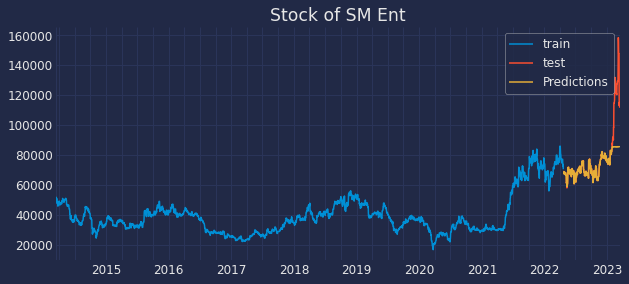

In [8]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(sm_train, sm_train['종가'])
predictions = rfr.predict(sm_test)
predictions = pd.DataFrame(predictions)
predictions.index = pd.to_datetime(predictions.index, origin=pd.Timestamp('2022-04-22'), unit = 'D')
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
sm_train['종가'].plot(ax=ax, label='train')
sm_test['종가'].plot(ax=ax, label='test')
plt.title("Stock of SM Ent")
predictions[0].plot(ax=ax, label='Predictions')
ax.legend();

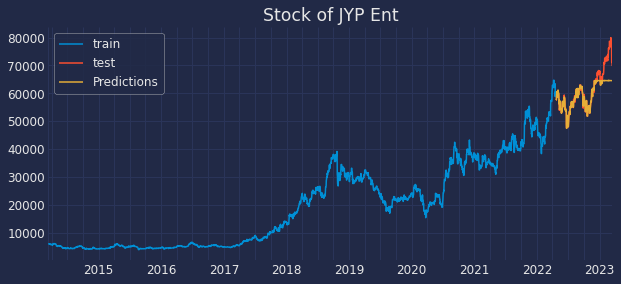

In [9]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(jyp_train, jyp_train['종가'])
predictions = rfr.predict(jyp_test)
predictions = pd.DataFrame(predictions)
predictions.index = pd.to_datetime(predictions.index, origin=pd.Timestamp('2022-04-22'), unit = 'D')
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
jyp_train['종가'].plot(ax=ax, label='train')
jyp_test['종가'].plot(ax=ax, label='test')
plt.title("Stock of JYP Ent")
predictions[0].plot(ax=ax, label='Predictions')
ax.legend();

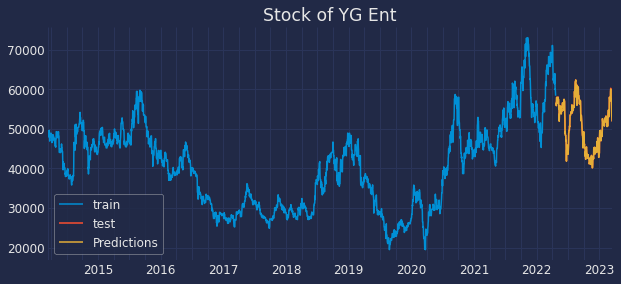

In [10]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(yg_train, yg_train['종가'])
predictions = rfr.predict(yg_test)
predictions = pd.DataFrame(predictions)
predictions.index = pd.to_datetime(predictions.index, origin=pd.Timestamp('2022-04-22'), unit = 'D')
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
yg_train['종가'].plot(ax=ax, label='train')
yg_test['종가'].plot(ax=ax, label='test')
plt.title("Stock of YG Ent")
predictions[0].plot(ax=ax, label='Predictions')
ax.legend();

# skforecast 적용(RandomForest)

In [11]:
# modelling
!pip install skforecast
from lightgbm import LGBMRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from sklearn.metrics import mean_pinball_loss

# Configuration
# ==============================================================================
import warnings
warnings.filterwarnings('once')
%config Completer.use_jedi = False

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 그리드 서치 없이 적용

<Axes: title={'center': 'Stock of JYP Ent'}>

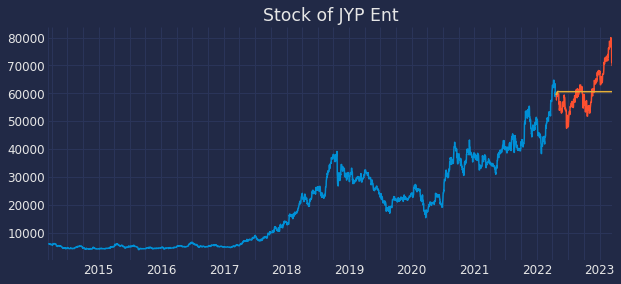

In [12]:
# Create and train forecaster
# ==============================================================================
from sklearn.ensemble import RandomForestRegressor
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 6
             )

forecaster.fit(y=jyp_train['종가'])
forecaster

# Predictions
# ==============================================================================
steps = len(jyp_test)
predictions = forecaster.predict(steps=steps)
predictions.head(5)

# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
jyp_train['종가'].plot(ax=ax, label='train')
jyp_test['종가'].plot(ax=ax, label='test')
plt.title("Stock of JYP Ent")
predictions.plot(ax=ax, label='predictions')

<Axes: title={'center': 'Stock of SM Ent'}>

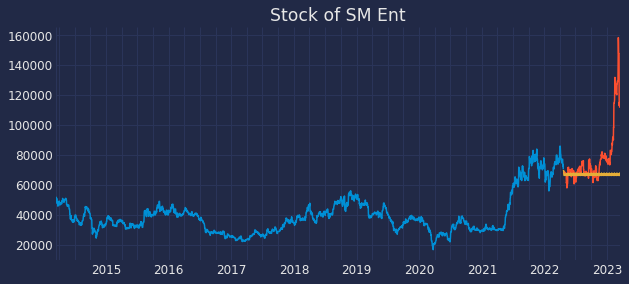

In [13]:
# Create and train forecaster
# ==============================================================================
from sklearn.ensemble import RandomForestRegressor
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 6
             )

forecaster.fit(y=sm_train['종가'])
forecaster

# Predictions
# ==============================================================================
steps = len(sm_test)
predictions = forecaster.predict(steps=steps)
predictions.head(5)


# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
sm_train['종가'].plot(ax=ax, label='train')
sm_test['종가'].plot(ax=ax, label='test')
plt.title("Stock of SM Ent")
predictions.plot(ax=ax, label='predictions')

2022-04-22    57051.0
2022-04-23    57289.0
2022-04-24    57479.0
2022-04-25    57809.0
2022-04-26    57137.0
Freq: D, Name: pred, dtype: float64


<Axes: title={'center': 'Stock of YG Ent'}>

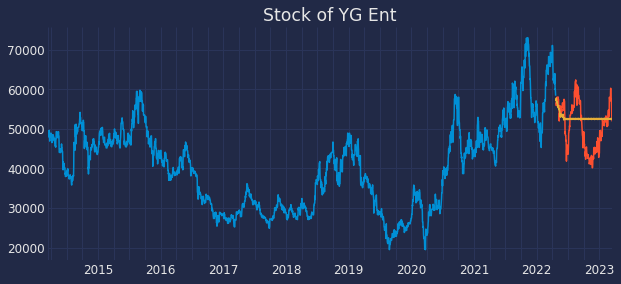

In [14]:
# Create and train forecaster
# ==============================================================================
from sklearn.ensemble import RandomForestRegressor
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 6
             )

forecaster.fit(y=yg_train['종가'])
forecaster

# Predictions
# ==============================================================================
steps = len(yg_test)
predictions = forecaster.predict(steps=steps)
print(predictions.head(5))


# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
yg_train['종가'].plot(ax=ax, label='train')
yg_test['종가'].plot(ax=ax, label='test')
plt.title("Stock of YG Ent")
predictions.plot(ax=ax, label='predictions')

### GridSearch

Number of models compared: 18.


loop lags_grid: 100%|███████████████████████████████████████| 3/3 [01:46<00:00, 35.49s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10] 
  Parameters: {'max_depth': 5, 'n_estimators': 50}
  Backtesting metric: 74995199.248105

2022-04-22    58837.312163
2022-04-23    58837.312163
2022-04-24    58837.312163
2022-04-25    58837.312163
2022-04-26    58837.312163
Freq: D, Name: pred, dtype: float64


<Axes: title={'center': 'Stock of JYP Ent'}>

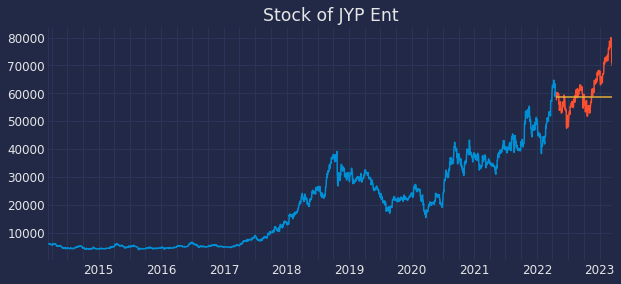

In [15]:
# Grid search hyperparameter and lags
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 10 # Placeholder, the value will be overwritten
             )

# Lags used as predictors
lags_grid = [3, 10, [1, 2, 3, 20]]

# Regressor hyperparameters
param_grid = {'n_estimators': [50, 100],
              'max_depth': [5, 10, 15]}

results_grid = grid_search_forecaster(
                        forecaster  = forecaster,
                        y           = jyp_s_c.iloc[:round(len(jyp_s_c)*0.9), 0],
                        param_grid  = param_grid,
                        lags_grid   = lags_grid,
                        steps       = 12,
                        refit       = False,
                        metric      = 'mean_squared_error',
                        initial_train_size = int(len(jyp_s_c.iloc[:round(len(jyp_s_c)*0.7),:])),
                        fixed_train_size   = False,
                        return_best = True,
                        verbose     = False
               )

# Predictions
# ==============================================================================
steps = len(jyp_test)
predictions = forecaster.predict(steps=steps)
print(predictions.head(5))

# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
jyp_train['종가'].plot(ax=ax, label='train')
jyp_test['종가'].plot(ax=ax, label='test')
plt.title("Stock of JYP Ent")
predictions.plot(ax=ax, label='predictions')

In [ ]:
# Grid search hyperparameter and lags
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 10 # Placeholder, the value will be overwritten
             )

# Lags used as predictors
lags_grid = [3, 10, [1, 2, 3, 20]]

# Regressor hyperparameters
param_grid = {'n_estimators': [50, 100],
              'max_depth': [5, 10, 15]}

results_grid = grid_search_forecaster(
                        forecaster  = forecaster,
                        y           = sm_s_c.iloc[:round(len(sm_s_c)*0.9), 0],
                        param_grid  = param_grid,
                        lags_grid   = lags_grid,
                        steps       = 12,
                        refit       = False,
                        metric      = 'mean_squared_error',
                        initial_train_size = int(len(sm_s_c.iloc[:round(len(sm_s_c)*0.7),:])),
                        fixed_train_size   = False,
                        return_best = True,
                        verbose     = False
               )

# Predictions
# ==============================================================================
steps = len(sm_test)
predictions = forecaster.predict(steps=steps)
print(predictions.head(5))

# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
sm_train['종가'].plot(ax=ax, label='train')
sm_test['종가'].plot(ax=ax, label='test')
plt.title("Stock of SM Ent")
predictions.plot(ax=ax, label='predictions')

Number of models compared: 18.


loop param_grid:  67%|█████████████████████████▎            | 4/6 [00:30<00:13,  6.79s/it]

Number of models compared: 18.


loop lags_grid: 100%|███████████████████████████████████████| 3/3 [01:35<00:00, 31.83s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10] 
  Parameters: {'max_depth': 5, 'n_estimators': 100}
  Backtesting metric: 21367774.749210387

2022-04-22    57631.843758
2022-04-23    57621.296139
2022-04-24    57621.296139
2022-04-25    57621.296139
2022-04-26    57621.296139
Freq: D, Name: pred, dtype: float64


<Axes: title={'center': 'Stock of YG Ent'}>

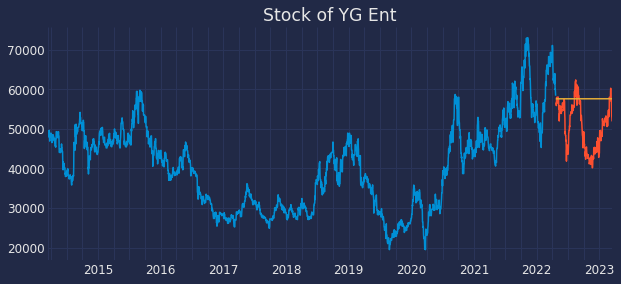

In [17]:
# Grid search hyperparameter and lags
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 10 # Placeholder, the value will be overwritten
             )

# Lags used as predictors
lags_grid = [3, 10, [1, 2, 3, 20]]

# Regressor hyperparameters
param_grid = {'n_estimators': [50, 100],
              'max_depth': [5, 10, 15]}

results_grid = grid_search_forecaster(
                        forecaster  = forecaster,
                        y           = yg_s_c.iloc[:round(len(yg_s_c)*0.9), 0],
                        param_grid  = param_grid,
                        lags_grid   = lags_grid,
                        steps       = 12,
                        refit       = False,
                        metric      = 'mean_squared_error',
                        initial_train_size = int(len(yg_s_c.iloc[:round(len(yg_s_c)*0.7),:])),
                        fixed_train_size   = False,
                        return_best = True,
                        verbose     = False
               )

# Predictions
# ==============================================================================
steps = len(yg_test)
predictions = forecaster.predict(steps=steps)
print(predictions.head(5))

# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
yg_train['종가'].plot(ax=ax, label='train')
yg_test['종가'].plot(ax=ax, label='test')
plt.title("Stock of YG Ent")
predictions.plot(ax=ax, label='predictions')